In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
path = os.getcwd()

def load_particles_bin(filename, n_particles):
    with open(filename, "rb") as f:
        data = np.fromfile(f, dtype=np.float64).reshape(n_particles, 7)
    return data

n_particles = int(1e5)
filename = path + "/particles/plummer_vel_3d_1e5_step0.bin"
particles = load_particles_bin(filename, n_particles)
x = particles[:, 1]
y = particles[:, 2]
z = particles[:, 3]
print("Loaded", n_particles, "particles.")

Loaded 100000 particles.


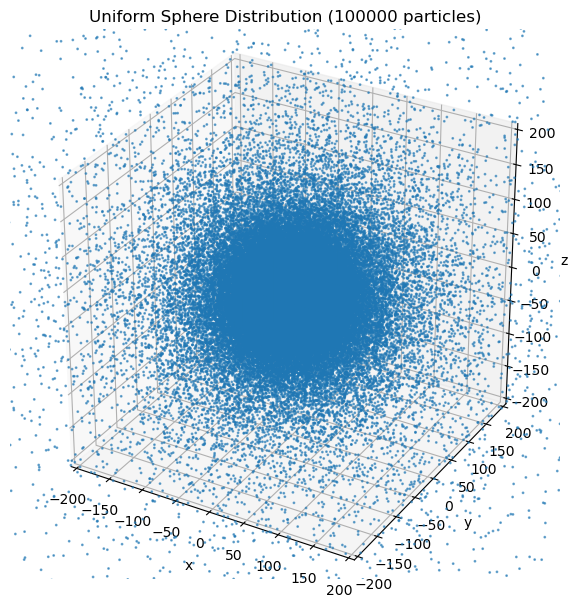

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, alpha=0.6)
ax.set_title("Plummer Sphere Distribution ({} particles)".format(n_particles))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect([1,1,1])
ax.set_xbound(-200, 200)
ax.set_ybound(-200, 200)
ax.set_zbound(-200, 200)
plt.tight_layout()

GIF 已儲存為 plummer_evolution.gif


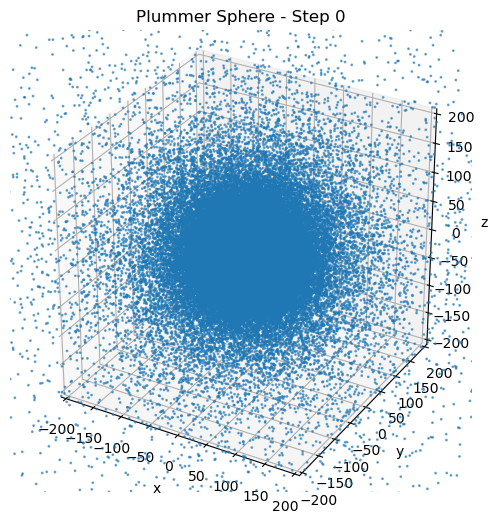

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import os

# 資料參數
n_particles = int(1e5)
n_steps = 101  # step0 到 step100
data_dir = os.getcwd() + "/particles"

# 載入某一時間步的資料
def load_particles(step):
    filename = f"{data_dir}/plummer_vel_3d_1e5_step{step}.bin"
    data = np.fromfile(filename, dtype=np.float64).reshape(n_particles, 7)
    return data[:, 1], data[:, 2], data[:, 3]

# 設定圖表
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter([], [], [], s=1, alpha=0.6)

ax.set_title("Plummer Sphere Evolution")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect([1, 1, 1])
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(-200, 200)

# 更新函數，每一幀載入不同時間步資料
def update(frame):
    x, y, z = load_particles(frame)
    sc._offsets3d = (x, y, z)
    ax.set_title(f"Plummer Sphere - Step {frame}")
    return sc,

# 建立動畫
ani = FuncAnimation(fig, update, frames=n_steps, interval=100, blit=False)

# 儲存成 GIF
ani.save("plummer_evolution.gif", writer="pillow", fps=10)

print("GIF 已儲存為 plummer_evolution.gif")
